# Cooling Degree Days (CDD) Calculation for Paris

To evaluate the temperature for a specific region and its implications on energy consumption, we often use indicators like the Cooling Degree Days (CDD). In this example, we will compute the CDD for Paris during July and August 2023 and determine the payoff of an option with a strike of 100.

## Step 1: Data Collection and Visualization
Using the meteostat library, we gather daily average temperature data for Paris:

In [1]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

### Setting the Time Period
We're interested in data from July 1, 2023, to August 31, 2023:

In [2]:
start = datetime(2023, 7, 1)
end = datetime(2023, 8, 31)

### Specifying the Location
For this analysis, we'll focus on Paris, France. The geographical coordinates (latitude, longitude, and altitude) for Paris are provided to the `Point` class:

In [3]:
location = Point(48.8566, 2.3522, 35)

### Fetching the Daily Data
Using the specified location and time range, we fetch the daily weather data:

In [4]:
data = Daily(location, start, end)
data = data.fetch()

### Plotting the Temperature Data
Lastly, we visualize the average daily temperature with a line chart:

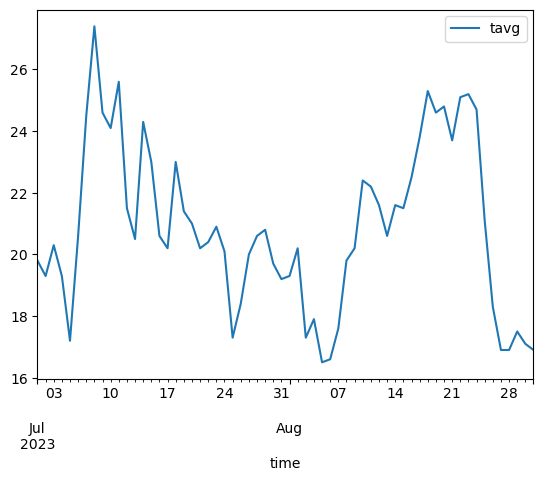

In [5]:
data.plot(y=['tavg'])
plt.show()

## Calculating Cooling Degree Days (CDD)

Cooling Degree Days (CDD) are a measure used to quantify the demand for energy needed to cool a building. The CDD is calculated as the difference between a day's average temperature and a base temperature, only considering days that are warmer than the base temperature. The formula is:

\\[ \text{CDD} = \max(T_{\text{avg}} - 18, 0) \\]

Where:
- \\( T_{\text{avg}} \\) is the average temperature for a day.

In [6]:
T_base = 18
cdds = [max(temp - T_base, 0) for temp in data.tavg]

## Calculating the Option Payoff

The option payoff for a call option is calculated as the difference between the asset price and the strike price, but only when the asset price is greater than the strike price. Otherwise, the payoff is zero. The formula is:

\\[ \text{Payoff} = \max(T_{\text{total_cdd}} - \text{strike}, 0) \\]

Where:
- \\( T_{\text{total\_cdd}} \\) is the sum of the CDDs for the period in question.
- \\( \text{strike} \\) is the strike price of the option.


In [7]:
strike = 100
total_cdd = sum(cdds)
payoff = max(total_cdd - strike, 0)

Results:

In [8]:
print("Total CDD:", total_cdd)
print("Option Payoff:", payoff)

Total CDD: 189.79999999999998
Option Payoff: 89.79999999999998


## Analysis of Option Payoff

Given the results:

- **Total CDD:** 189.8 
- **Option Payoff:** 89.8

If you were to purchase this option for $50, here's the breakdown of your financial outcome:

The option payoff represents the amount you stand to gain from the option. This is calculated as 
\\[ \text{Option Payoff} = \text{Total CDD} - \text{strike} \\].

In this scenario, the option payoff is $89.8. 

If you bought the option for $50, your net profit would be:

\\[ \text{Net Profit} = \text{Option Payoff} - \text{Cost of Option} \\]

\\[ \text{Net Profit} = $89.8 - $50 \\]

\\[ \text{Net Profit} = $39.8 \\]

So, you would make a profit of $39.8.